# Introduction to Vector Fields

**Part 0 of the GRL Field Series — Gentle Introduction**

Welcome! This notebook provides a **gentle introduction** to vector fields with real-world examples and intuition-building.

---

## Learning Objectives

By the end of this notebook, you'll understand:

1. **What is a vector field?** (arrows at each point in space)
2. **Gradient fields** — following "uphill" directions

**Prerequisites:** Basic calculus (derivatives), linear algebra (vectors)

**Time:** ~10-15 minutes

---

## Why This Matters for GRL

**Vector fields** are the stepping stone to **functional fields**. Once you understand how arrows at each point create a field, you'll be ready to understand how **functions** at each point create GRL's reinforcement field!

**Progression:**
```
Introduction (this notebook) ← You are here
    ↓
Classical Vector Fields (Notebook 1)
    ↓
Functional Fields (Notebook 2)
    ↓
GRL Reinforcement Fields (Notebook 3)
```

**Next:** For a complete treatment including rotational fields, superposition, and trajectories, see `01_classical_vector_fields.ipynb`.

In [1]:
# Setup: Import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Set visualization style
sns.set_theme(style='whitegrid', context='notebook')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11

# For inline plots
%matplotlib inline

print("✓ Libraries loaded successfully!")

✓ Libraries loaded successfully!


---

## Part 1: What is a Vector Field?

### Definition

A **vector field** assigns a vector (arrow) to every point in space.

**Mathematically**, in 2D:
$$
\mathbf{F}(x, y) = \begin{bmatrix} F_x(x, y) \\ F_y(x, y) \end{bmatrix}
$$

At each point $(x, y)$, the field $\mathbf{F}$ gives us a 2D vector with:
- **Direction**: Where the arrow points
- **Magnitude**: How long the arrow is

### Real-World Examples

- **Gravity field**: Arrows point downward, magnitude depends on mass/distance
- **Wind field**: Arrows show wind direction and speed at each location
- **Electric field**: Arrows show force on a charged particle
- **Fluid flow**: Arrows show velocity of water/air at each point

### Visual Representation

We typically use:
- **Quiver plots**: Arrows at sampled grid points
- **Streamlines**: Curves that follow the field direction
- **Color maps**: Color intensity shows magnitude

Let's create our first vector field!

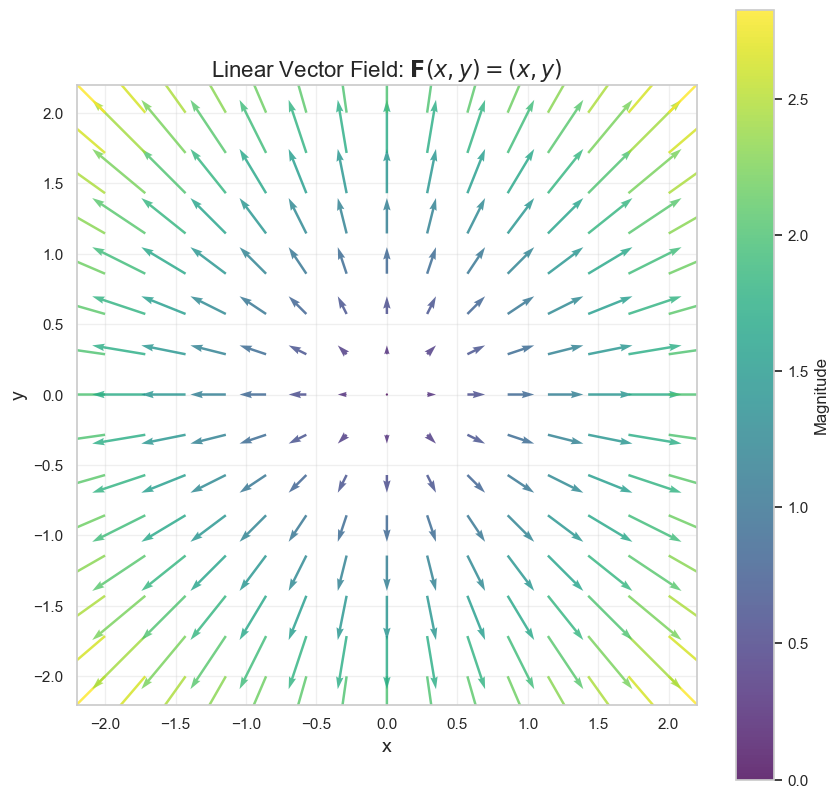

Key Observation: Arrows point AWAY from the origin
                 Magnitude increases with distance from center


In [2]:
# Example 1: Simple Linear Vector Field
# F(x, y) = (x, y) — arrows point away from origin

# Create a grid of points
x = np.linspace(-2, 2, 15)
y = np.linspace(-2, 2, 15)
X, Y = np.meshgrid(x, y)

# Define the vector field: F(x,y) = (x, y)
U = X  # x-component
V = Y  # y-component

# Compute magnitude for coloring
magnitude = np.sqrt(U**2 + V**2)

# Visualize
fig, ax = plt.subplots(figsize=(10, 10))
quiver = ax.quiver(X, Y, U, V, magnitude, cmap='viridis', alpha=0.8, scale=20)
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_title('Linear Vector Field: $\\mathbf{F}(x,y) = (x, y)$', fontsize=16)
ax.grid(True, alpha=0.3)
ax.set_aspect('equal')
plt.colorbar(quiver, ax=ax, label='Magnitude')
plt.show()

print("Key Observation: Arrows point AWAY from the origin")
print("                 Magnitude increases with distance from center")

---

## Part 2: Gradient Fields — The Path to Optimization

### What is a Gradient?

Given a scalar function $V(x, y)$ (called a **potential**), its **gradient** is:
$$
\nabla V = \begin{bmatrix} \frac{\partial V}{\partial x} \\ \frac{\partial V}{\partial y} \end{bmatrix}
$$

**Key Property:** The gradient points in the direction of **steepest ascent**!

### Connection to GRL

In GRL, the **reinforcement field** $Q^+(s, a)$ is like a potential. Its gradient tells us which direction to move in state-action space to improve expected reward!

**Gradient descent** (going downhill) → **Gradient ascent** (going uphill in GRL!)

Let's visualize a gradient field.

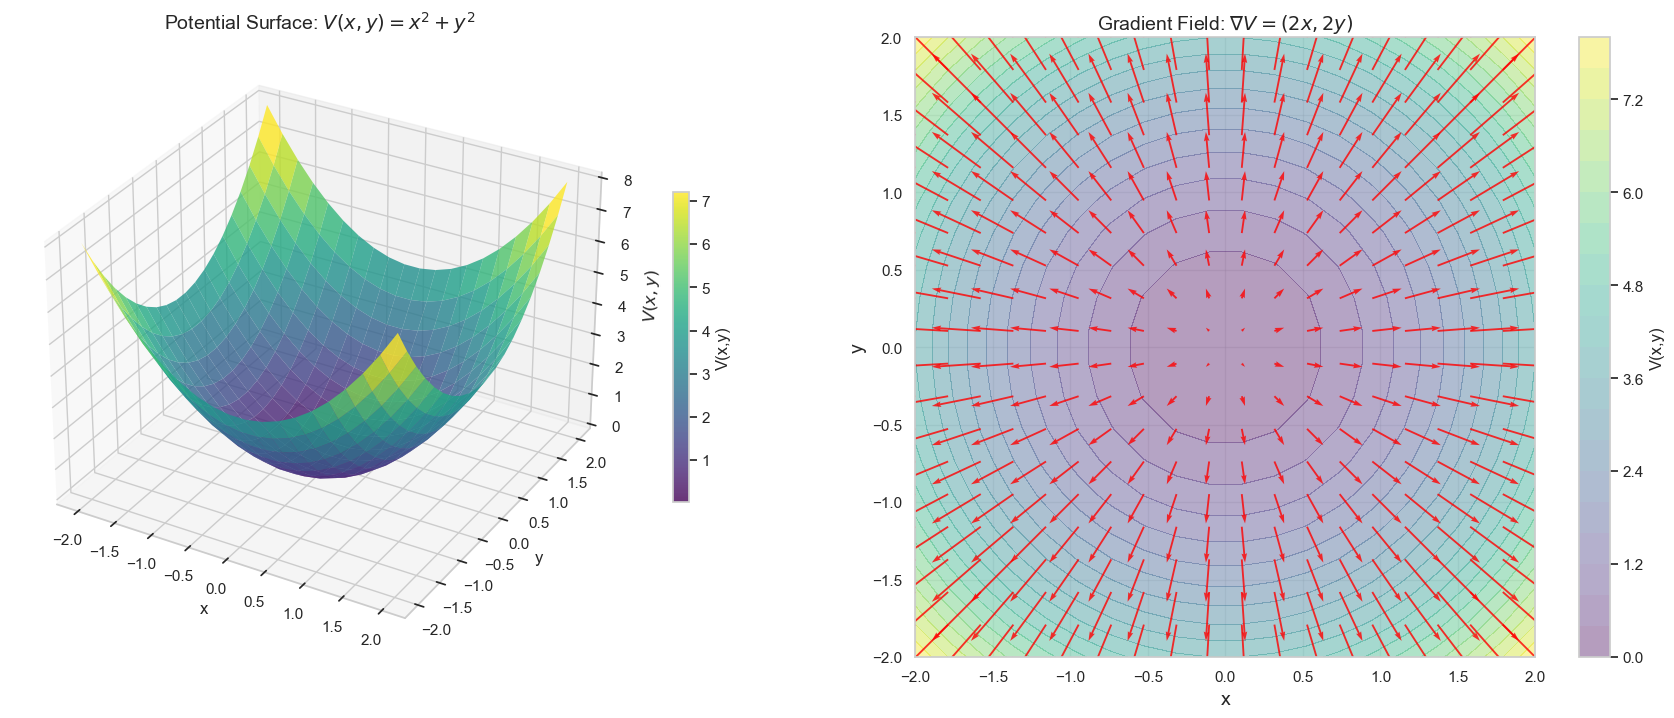

✓ Key Insights:
  1. Gradient arrows point UPHILL on the potential surface
  2. At the minimum (0,0), gradient is ZERO (no arrows)
  3. Magnitude grows with distance from minimum
  4. To MINIMIZE: follow NEGATIVE gradient (gradient descent)
  5. To MAXIMIZE: follow POSITIVE gradient (gradient ascent)


In [3]:
# Example: Gradient of a Parabolic Bowl
# Potential: V(x,y) = x^2 + y^2
# Gradient: ∇V = (2x, 2y)

def potential(x, y):
    """Parabolic bowl potential"""
    return x**2 + y**2

def gradient_field(x, y):
    """Gradient of the potential"""
    return 2*x, 2*y

# Create grid (finer for smoother surface)
x = np.linspace(-2, 2, 20)
y = np.linspace(-2, 2, 20)
X, Y = np.meshgrid(x, y)

# Compute potential and gradient
Z = potential(X, Y)
U, V = gradient_field(X, Y)

# Create side-by-side visualization
fig = plt.figure(figsize=(18, 7))

# Left: Potential surface (3D)
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8, edgecolor='none')
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('y', fontsize=12)
ax1.set_zlabel('$V(x,y)$', fontsize=12)
ax1.set_title('Potential Surface: $V(x,y) = x^2 + y^2$', fontsize=14)
fig.colorbar(surf, ax=ax1, shrink=0.5, label='V(x,y)')

# Right: Gradient field (2D)
ax2 = fig.add_subplot(122)
contour = ax2.contourf(X, Y, Z, levels=20, cmap='viridis', alpha=0.4)
quiver = ax2.quiver(X, Y, U, V, color='red', alpha=0.8, scale=40)
ax2.set_xlabel('x', fontsize=14)
ax2.set_ylabel('y', fontsize=14)
ax2.set_title('Gradient Field: $\\nabla V = (2x, 2y)$', fontsize=14)
ax2.set_aspect('equal')
ax2.grid(True, alpha=0.3)
fig.colorbar(contour, ax=ax2, label='V(x,y)')

plt.tight_layout()
plt.show()

print("✓ Key Insights:")
print("  1. Gradient arrows point UPHILL on the potential surface")
print("  2. At the minimum (0,0), gradient is ZERO (no arrows)")
print("  3. Magnitude grows with distance from minimum")
print("  4. To MINIMIZE: follow NEGATIVE gradient (gradient descent)")
print("  5. To MAXIMIZE: follow POSITIVE gradient (gradient ascent)")